<a href="https://colab.research.google.com/github/Ash100/Minor/blob/main/GeniProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 12.0 MB/s eta 0:00:00


In [2]:
from google.colab import files

uploaded = files.upload()

Saving rbcL_aligned.fas to rbcL_aligned.fas


In [3]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
import numpy as np

# Load the sequences from the uploaded FASTA file
fasta_file = next(iter(uploaded))  # Get the file name
sequences = list(SeqIO.parse(fasta_file, "fasta"))

In [13]:
# Create a multiple sequence alignment object
alignment = MultipleSeqAlignment(sequences)

# Function to calculate nucleotide diversity (Pi)
def calculate_nucleotide_diversity(alignment):
    num_sequences = len(alignment)
    num_sites = alignment.get_alignment_length()
    pairwise_differences = 0

    for i in range(num_sequences):
        for j in range(i + 1, num_sequences):
            pairwise_differences += sum(base1 != base2 for base1, base2 in zip(alignment[i].seq, alignment[j].seq))

    total_comparisons = num_sequences * (num_sequences - 1) / 2
    nucleotide_diversity = pairwise_differences / (total_comparisons * num_sites)
    return nucleotide_diversity

In [14]:
# Calculate nucleotide diversity
nucleotide_diversity = calculate_nucleotide_diversity(alignment)
print(f"Nucleotide Diversity (Pi): {nucleotide_diversity}")

Nucleotide Diversity (Pi): 0.0024097447727640066


In [21]:
#@title segregating sites

from Bio import AlignIO

def calculate_segregating_sites(alignment):
    """
    Calculate the number of segregating sites in a multiple sequence alignment.

    Parameters:
    - alignment: A MultipleSeqAlignment object from Biopython.

    Returns:
    - segregating_sites: Number of segregating sites in the alignment.
    """
    num_sites = alignment.get_alignment_length()
    segregating_sites = 0

    for i in range(num_sites):
        column = alignment[:, i]
        unique_bases = set(column)
        if len(unique_bases) > 1:
            segregating_sites += 1

    return segregating_sites

# Load your alignment file (adjust the file path and format as needed)
alignment = AlignIO.read("/content/rbcL_aligned.fas", "fasta")  # Change to your file and format

# Calculate segregating sites
segregating_sites = calculate_segregating_sites(alignment)
print(f"Segregating Sites: {segregating_sites}")

Segregating Sites: 5


Segregating Sites: 5


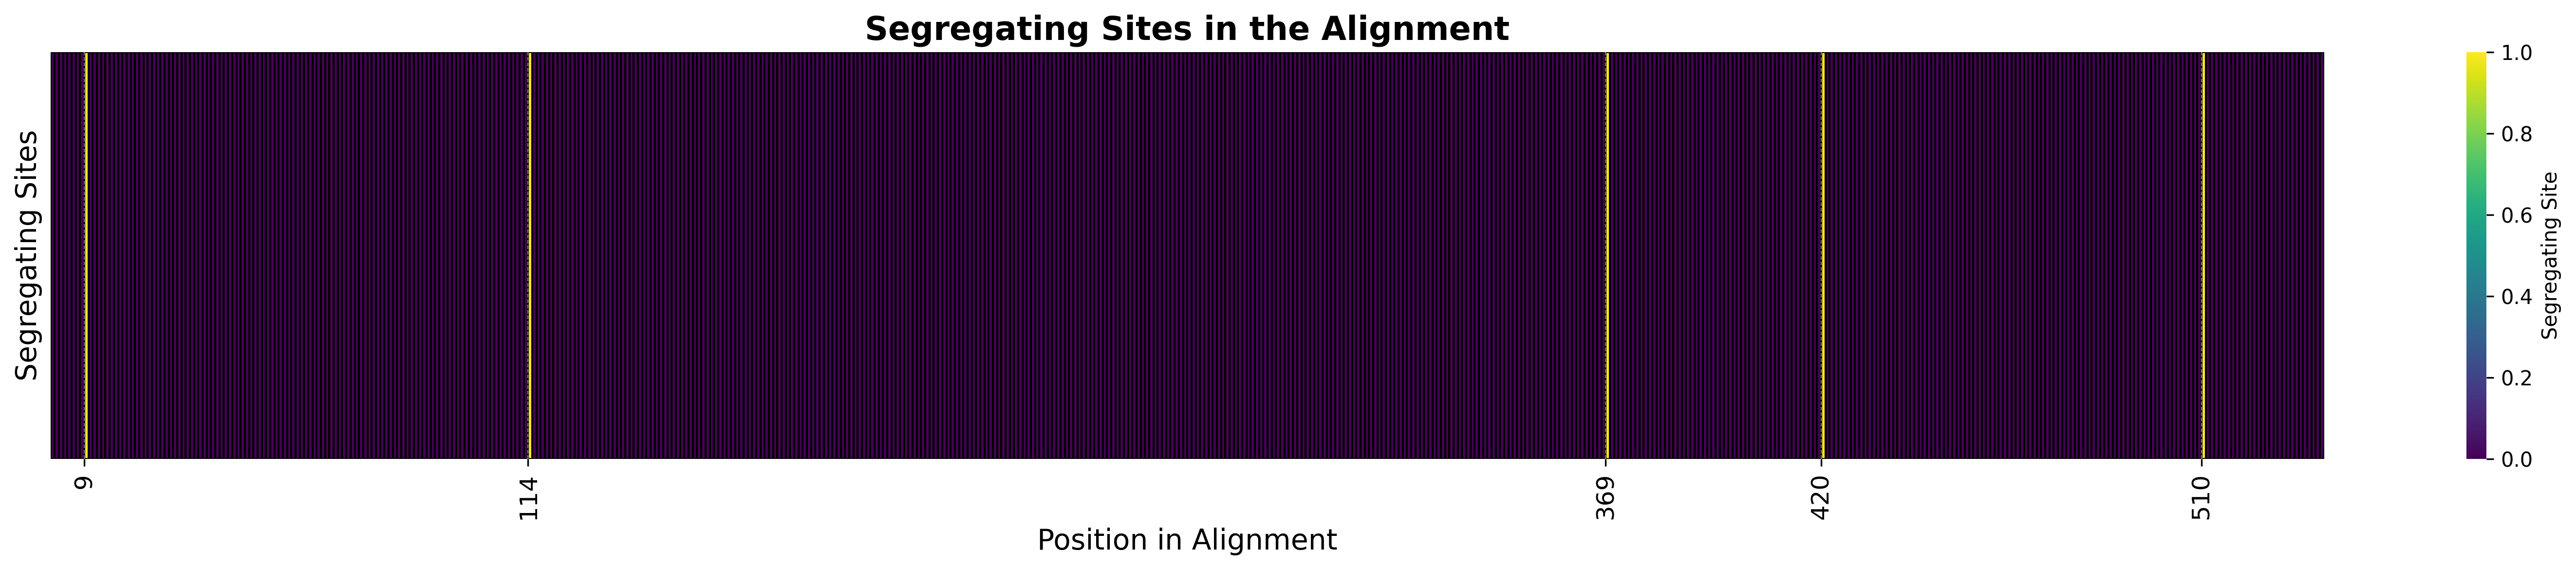

In [22]:
#@title Visualize Segregation sites
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def calculate_segregating_sites(alignment):
    num_sites = alignment.get_alignment_length()
    segregating_sites = []

    for i in range(num_sites):
        column = alignment[:, i]
        unique_bases = set(column)
        if len(unique_bases) > 1:
            segregating_sites.append(i)

    return segregating_sites

# Calculate segregating sites
segregating_sites = calculate_segregating_sites(alignment)
print(f"Segregating Sites: {len(segregating_sites)}")

# Create a binary matrix where 1 indicates a segregating site and 0 indicates non-segregating
num_sites = alignment.get_alignment_length()
segregating_matrix = np.zeros((1, num_sites))

for site in segregating_sites:
    segregating_matrix[0, site] = 1

# Plot the segregating sites with position numbers
plt.figure(figsize=(20, 4), dpi=300)
ax = sns.heatmap(segregating_matrix, cmap="viridis", cbar=True, cbar_kws={'label': 'Segregating Site'},
                 xticklabels=False, yticklabels=False, linewidths=0.5, linecolor='black', annot=False)

# Set x-axis ticks only at the segregating site positions
ax.set_xticks(segregating_sites)
ax.set_xticklabels([str(site + 1) for site in segregating_sites], fontsize=12, rotation=90)

# Improve plot aesthetics
plt.title('Segregating Sites in the Alignment', fontsize=16, fontweight='bold')
plt.xlabel('Position in Alignment', fontsize=14)
plt.ylabel('Segregating Sites', fontsize=14)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Save the plot to a file
plt.tight_layout()
plt.savefig('segregating_sites_heatmap.png', dpi=300)
plt.show()

In [29]:
#@title Calculate Haplotype Diversity
def calculate_haplotype_diversity(sequences):
    num_sequences = len(sequences)
    haplotypes = set(str(record.seq) for record in sequences)
    haplotype_counts = [sum(1 for record in sequences if str(record.seq) == haplotype) for haplotype in haplotypes]
    haplotype_freqs = [count / num_sequences for count in haplotype_counts]
    haplotype_diversity = 1 - sum(f ** 2 for f in haplotype_freqs)
    return haplotype_diversity

# Calculate haplotype diversity
haplotype_diversity = calculate_haplotype_diversity(sequences)
print(f"Haplotype Diversity: {haplotype_diversity}")

Haplotype Diversity: 0.7032136105860114


In [32]:
import matplotlib.pyplot as plt

def calculate_haplotype_diversity(sequences):
    """
    Calculate haplotype diversity based on the sequence records.

    Parameters:
    - sequences: A list of sequence records from Biopython.

    Returns:
    - haplotype_diversity: Haplotype diversity index.
    """
    num_sequences = len(sequences)

    # Extract haplotypes and their counts
    haplotypes = [str(record.seq) for record in sequences]
    unique_haplotypes = list(set(haplotypes))
    haplotype_counts = [haplotypes.count(haplotype) for haplotype in unique_haplotypes]

    # Calculate frequencies
    haplotype_freqs = [count / num_sequences for count in haplotype_counts]

    # Calculate haplotype diversity using Simpson's index
    haplotype_diversity = 1 - sum(f ** 2 for f in haplotype_freqs)

    return unique_haplotypes, haplotype_counts, haplotype_diversity

# Example sequences (replace with your actual data)
# Each record should have an id (name) and seq (sequence)
from Bio import SeqIO
sequences = list(SeqIO.parse("/content/rbcL_aligned.fas", "fasta"))  # Replace with your file and format

# Calculate haplotype diversity and get haplotype data
unique_haplotypes, haplotype_counts, haplotype_diversity = calculate_haplotype_diversity(sequences)
print(f"Haplotype Diversity: {haplotype_diversity}")

Haplotype Diversity: 0.7032136105860114


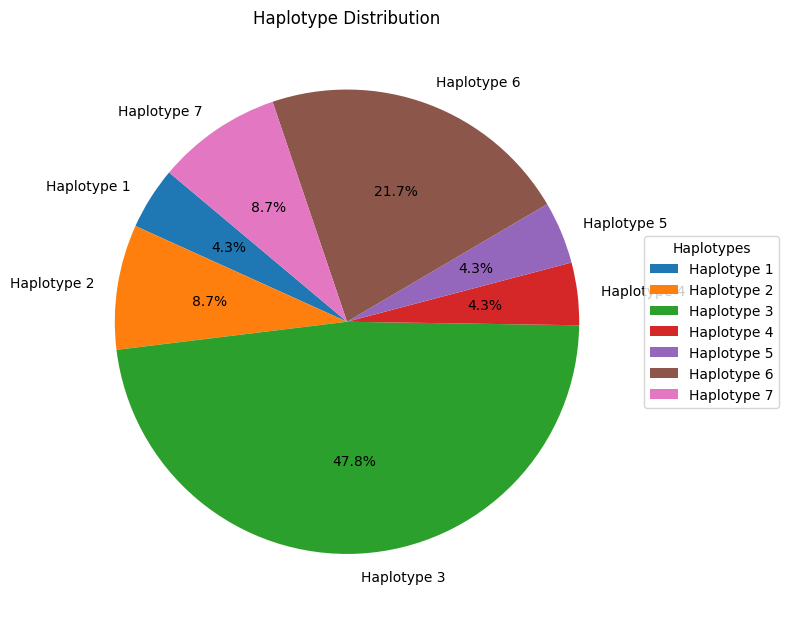

Haplotype 1:
  - LM652998
Haplotype 2:
  - NC_037389
  - OR543091
Haplotype 3:
  - PP938051
  - OQ603454
  - OQ603452
  - OQ603442
  - OQ603438
  - OQ603435
  - OQ603430
  - OQ603422
  - PP894780
  - PP894776
  - PP894769
Haplotype 4:
  - LC588401
Haplotype 5:
  - LT222089
Haplotype 6:
  - OQ603443
  - MF044850
  - MF044848
  - LM653020
  - AB125016
Haplotype 7:
  - MF044952
  - LM652975


In [33]:
# Create a mapping from haplotype label to members
haplotype_members = {f'Haplotype {i+1}': [] for i in range(len(unique_haplotypes))}
for record in sequences:
    haplotype_label = f'Haplotype {unique_haplotypes.index(str(record.seq))+1}'
    haplotype_members[haplotype_label].append(record.id)

# Pie chart for Haplotype Diversity
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
wedges, texts, autotexts = plt.pie(haplotype_counts, labels=[f'Haplotype {i+1}' for i in range(len(unique_haplotypes))],
                                   autopct='%1.1f%%', startangle=140)
plt.title('Haplotype Distribution')

# Add legend
plt.legend(wedges, [f'Haplotype {i+1}' for i in range(len(unique_haplotypes))],
           title="Haplotypes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

# Print members of each haplotype
for haplotype, members in haplotype_members.items():
    print(f"{haplotype}:")
    for member in members:
        print(f"  - {member}")

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np

def hamming_distance(seq1, seq2):
    """Calculate the Hamming distance between two sequences."""
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))

def create_haplotype_network(haplotypes):
    """Create a haplotype network based on Hamming distances."""
    G = nx.Graph()

    # Add nodes (haplotypes)
    for haplotype in haplotypes:
        G.add_node(haplotype)

    # Calculate pairwise distances and add edges
    for hap1, hap2 in combinations(haplotypes, 2):
        distance = hamming_distance(hap1, hap2)
        G.add_edge(hap1, hap2, weight=distance)

    return G

# Example sequences (replace with your actual data)
haplotypes = [str(record.seq) for record in sequences]  # Convert sequences to haplotypes

# Create the haplotype network
G = create_haplotype_network(haplotypes)

<ipython-input-42-b63a0ea21e53>:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(set(haplotypes)))


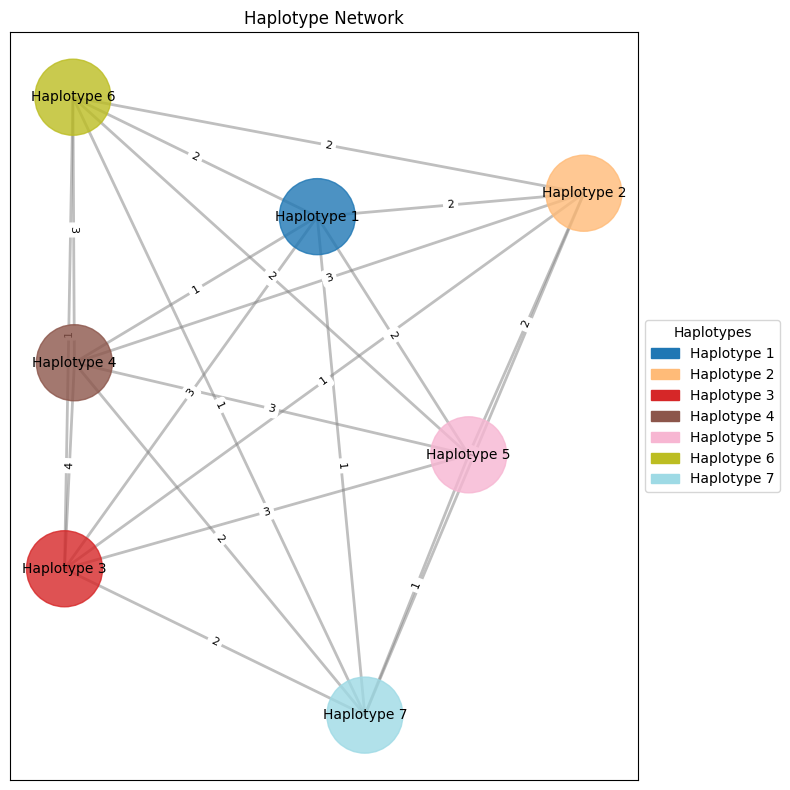

In [42]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import matplotlib.patches as mpatches
import numpy as np

def hamming_distance(seq1, seq2):
    """Calculate the Hamming distance between two sequences."""
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))

def create_haplotype_network(haplotypes):
    """Create a haplotype network based on Hamming distances."""
    unique_haplotypes = list(set(haplotypes))  # Extract unique haplotypes
    haplotype_to_label = {hap: f'Haplotype {i+1}' for i, hap in enumerate(unique_haplotypes)}

    G = nx.Graph()

    # Add nodes with haplotype labels
    for hap in unique_haplotypes:
        G.add_node(hap, label=haplotype_to_label[hap])

    # Calculate pairwise distances and add edges
    for hap1, hap2 in combinations(unique_haplotypes, 2):
        distance = hamming_distance(hap1, hap2)
        G.add_edge(hap1, hap2, weight=distance)

    return G, haplotype_to_label

# Example sequences (replace with your actual data)
# Extract haplotypes
haplotypes = [str(record.seq) for record in sequences]

# Create the haplotype network
G, haplotype_to_label = create_haplotype_network(haplotypes)

# Generate a color map for haplotypes
colors = plt.cm.get_cmap('tab20', len(set(haplotypes)))

# Assign a color to each haplotype
haplotype_colors = {hap: colors(i) for i, hap in enumerate(set(haplotypes))}

# Draw the network
plt.figure(figsize=(8, 8))

# Compute positions using a layout algorithm
pos = nx.spring_layout(G, seed=42)  # Use seed for reproducibility

# Draw nodes with specific colors
node_colors = [haplotype_colors[hap] for hap in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color=node_colors, alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='gray')

# Draw node labels
nx.draw_networkx_labels(G, pos, labels={node: haplotype_to_label[node] for node in G.nodes()}, font_size=10, font_family='sans-serif')

# Draw edge labels (distances)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Prepare legend with haplotype labels and colors
handles = [mpatches.Patch(color=haplotype_colors[hap], label=label) for hap, label in haplotype_to_label.items()]
plt.legend(handles=handles, title="Haplotypes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Haplotype Network')
plt.tight_layout()
plt.show()

<ipython-input-59-d48f46980fd5>:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(set(haplotypes)))


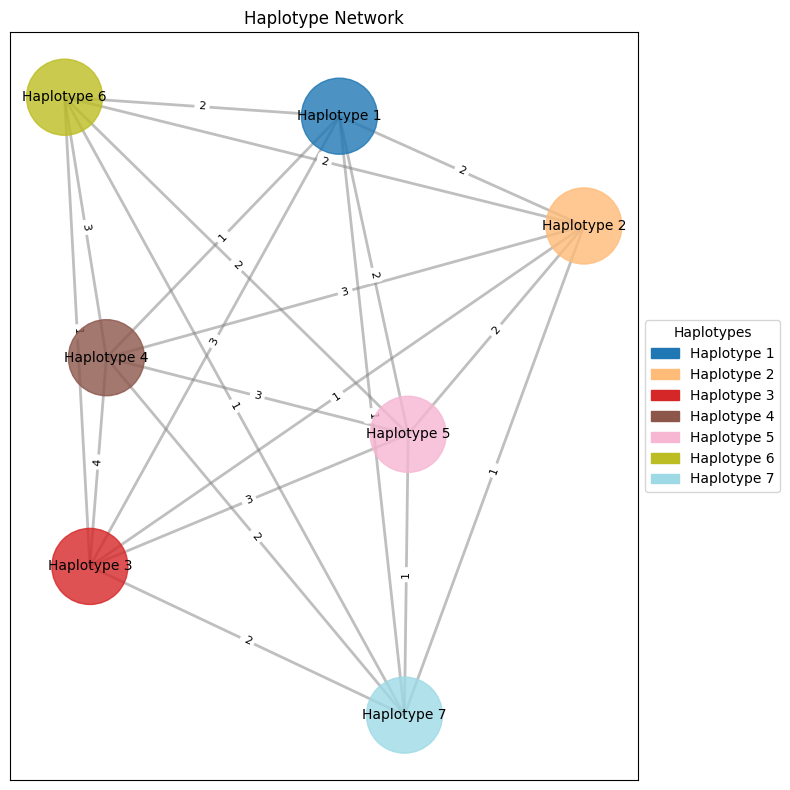

In [59]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import matplotlib.patches as mpatches

def hamming_distance(seq1, seq2):
    """Calculate the Hamming distance between two sequences."""
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))

def create_haplotype_network(haplotypes):
    """Create a haplotype network based on Hamming distances."""
    unique_haplotypes = list(set(haplotypes))  # Extract unique haplotypes
    haplotype_to_label = {hap: f'Haplotype {i+1}' for i, hap in enumerate(unique_haplotypes)}

    G = nx.Graph()

    # Add nodes with haplotype labels
    for hap in unique_haplotypes:
        G.add_node(hap, label=haplotype_to_label[hap])

    # Calculate pairwise distances and add edges
    for hap1, hap2 in combinations(unique_haplotypes, 2):
        distance = hamming_distance(hap1, hap2)
        G.add_edge(hap1, hap2, weight=distance)

    return G, haplotype_to_label

# Example sequences (replace with your actual data)
# Extract haplotypes
haplotypes = [str(record.seq) for record in sequences]

# Create the haplotype network
G, haplotype_to_label = create_haplotype_network(haplotypes)

# Generate a color map for haplotypes
colors = plt.cm.get_cmap('tab20', len(set(haplotypes)))

# Assign a color to each haplotype
haplotype_colors = {hap: colors(i) for i, hap in enumerate(set(haplotypes))}

# Draw the network
plt.figure(figsize=(8, 8))

# Compute positions using the spring layout algorithm with improved parameters
pos = nx.spring_layout(G, seed=42, k=0.5)  # Adjust `k` for better spacing

# Draw nodes with specific colors
node_colors = [haplotype_colors[hap] for hap in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color=node_colors, alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='gray')

# Draw node labels
nx.draw_networkx_labels(G, pos, labels={node: haplotype_to_label[node] for node in G.nodes()}, font_size=10, font_family='sans-serif')

# Draw edge labels (distances)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Prepare legend with haplotype labels and colors
handles = [mpatches.Patch(color=haplotype_colors[hap], label=label) for hap, label in haplotype_to_label.items()]
plt.legend(handles=handles, title="Haplotypes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Haplotype Network')
plt.tight_layout()
plt.show()

<ipython-input-60-7a1b3820f730>:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(set(haplotypes)))


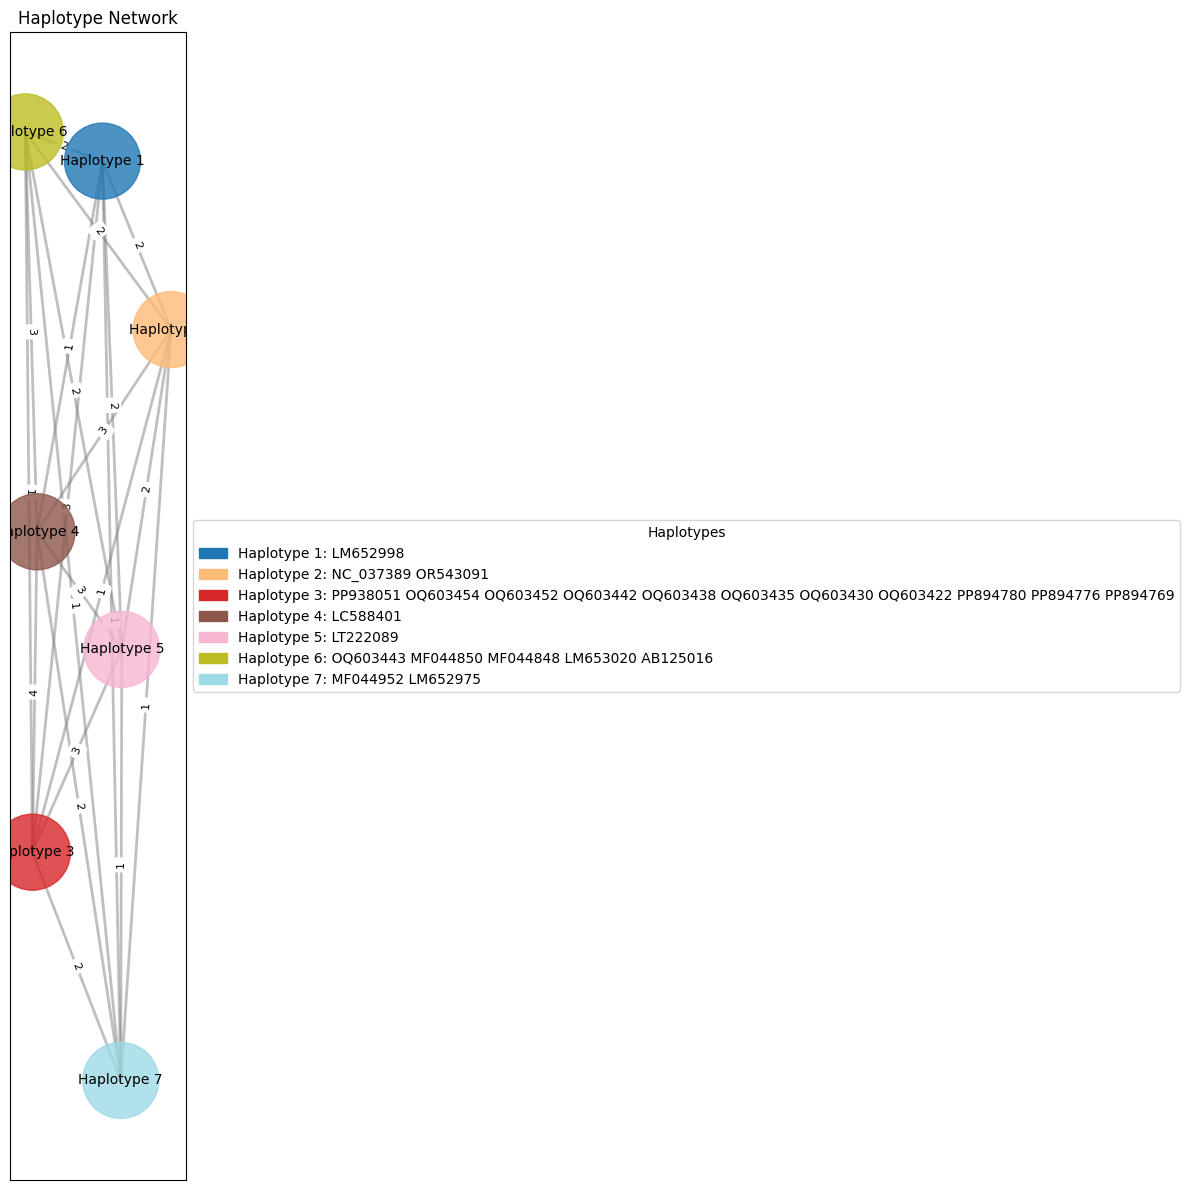

In [60]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import matplotlib.patches as mpatches

def hamming_distance(seq1, seq2):
    """Calculate the Hamming distance between two sequences."""
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))

def create_haplotype_network(haplotypes, haplotype_names):
    """Create a haplotype network based on Hamming distances."""
    unique_haplotypes = list(set(haplotypes))  # Extract unique haplotypes
    haplotype_to_label = {hap: f'Haplotype {i+1}' for i, hap in enumerate(unique_haplotypes)}

    # Create a mapping from haplotype label to its members
    haplotype_members = {f'Haplotype {i+1}': [] for i in range(len(unique_haplotypes))}
    for i, haplotype in enumerate(haplotypes):
        haplotype_label = f'Haplotype {unique_haplotypes.index(haplotype)+1}'
        haplotype_members[haplotype_label].append(haplotype_names[i])

    G = nx.Graph()

    # Add nodes with haplotype labels
    for hap in unique_haplotypes:
        G.add_node(hap, label=haplotype_to_label[hap])

    # Calculate pairwise distances and add edges
    for hap1, hap2 in combinations(unique_haplotypes, 2):
        distance = hamming_distance(hap1, hap2)
        G.add_edge(hap1, hap2, weight=distance)

    return G, haplotype_to_label, haplotype_members

# Example sequences (replace with your actual data)
# Extract haplotypes and their names
haplotypes = [str(record.seq) for record in sequences]
haplotype_names = [record.id for record in sequences]  # Replace with the actual way to get names

# Create the haplotype network
G, haplotype_to_label, haplotype_members = create_haplotype_network(haplotypes, haplotype_names)

# Generate a color map for haplotypes
colors = plt.cm.get_cmap('tab20', len(set(haplotypes)))

# Assign a color to each haplotype
haplotype_colors = {hap: colors(i) for i, hap in enumerate(set(haplotypes))}

# Draw the network
plt.figure(figsize=(12, 12))

# Compute positions using the spring layout algorithm with improved parameters
pos = nx.spring_layout(G, seed=42, k=0.5)  # Adjust `k` for better spacing

# Draw nodes with specific colors
node_colors = [haplotype_colors[hap] for hap in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color=node_colors, alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='gray')

# Draw node labels
nx.draw_networkx_labels(G, pos, labels={node: haplotype_to_label[node] for node in G.nodes()}, font_size=10, font_family='sans-serif')

# Draw edge labels (distances)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Prepare legend with haplotype labels and colors
handles = []
for hap, color in haplotype_colors.items():
    members = haplotype_members[haplotype_to_label[hap]]
    label = f"{haplotype_to_label[hap]}: {' '.join(members)}"
    handles.append(mpatches.Patch(color=color, label=label))

plt.legend(handles=handles, title="Haplotypes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Haplotype Network')
plt.tight_layout()
plt.show()